## Implementing an Autoencoder in PyTorch


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torchvision
import torchvision.transforms as transforms

In [3]:
E = nn.Sequential(
    nn.Linear(28*28, 300),
    nn.ReLU(),
    nn.Linear(300, 100),
    nn.Sigmoid()
)

print(E)

Sequential(
  (0): Linear(in_features=784, out_features=300, bias=True)
  (1): ReLU()
  (2): Linear(in_features=300, out_features=100, bias=True)
  (3): Sigmoid()
)


In [4]:
D  = nn.Sequential(nn.Linear(100, 300),
                   nn.ReLU(),
                   nn.Linear(300, 28*28),
                   nn.Sigmoid())
       
print(D)

Sequential(
  (0): Linear(in_features=100, out_features=300, bias=True)
  (1): ReLU()
  (2): Linear(in_features=300, out_features=784, bias=True)
  (3): Sigmoid()
)


In [5]:
# load dataset
tr = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

training_data = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=tr)
training_loader = torch.utils.data.DataLoader(training_data, batch_size=64,
                                          shuffle=True, num_workers=1)

test_data = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=tr)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=len(test_data),
                                         shuffle=True, num_workers=1)

In [6]:
params = list(E.parameters()) + list(D.parameters())

In [7]:
mse = nn.MSELoss()
opt = optim.RMSprop(params, lr=0.001)

In [8]:
def add_noise(inp):
    return inp + torch.randn(inp.shape)

In [9]:
epochs = 3
history = []

for i in range(0, epochs):
    for j,(inputs, labels) in enumerate(training_loader):
        # zero the parameter gradients
        opt.zero_grad()

        # reshape inputs
        inputs = inputs.view(-1,28*28)
        
        # add noise to the inputs
        inputs = add_noise(inputs)
        
        # forward pass
        latent = E(inputs)
        outputs = D(latent)
        
        # training loss
        loss = mse(outputs, inputs)
        history.append(loss.item())
        
        # backward pass
        loss.backward()
        opt.step()

        if (j+1)%100==0:
            print("epoch: {:2} batch: {:4} loss: {:3.4}".format(i+1,j+1,history[-1]))

epoch:  1 batch:  100 loss: 1.698
epoch:  1 batch:  200 loss: 1.64
epoch:  1 batch:  300 loss: 1.649
epoch:  1 batch:  400 loss: 1.598
epoch:  1 batch:  500 loss: 1.597
epoch:  1 batch:  600 loss: 1.6
epoch:  1 batch:  700 loss: 1.594
epoch:  1 batch:  800 loss: 1.595
epoch:  1 batch:  900 loss: 1.59
epoch:  2 batch:  100 loss: 1.59
epoch:  2 batch:  200 loss: 1.582
epoch:  2 batch:  300 loss: 1.569
epoch:  2 batch:  400 loss: 1.569
epoch:  2 batch:  500 loss: 1.566
epoch:  2 batch:  600 loss: 1.596
epoch:  2 batch:  700 loss: 1.551
epoch:  2 batch:  800 loss: 1.529
epoch:  2 batch:  900 loss: 1.571
epoch:  3 batch:  100 loss: 1.556
epoch:  3 batch:  200 loss: 1.541
epoch:  3 batch:  300 loss: 1.543
epoch:  3 batch:  400 loss: 1.547
epoch:  3 batch:  500 loss: 1.522
epoch:  3 batch:  600 loss: 1.529
epoch:  3 batch:  700 loss: 1.568
epoch:  3 batch:  800 loss: 1.523
epoch:  3 batch:  900 loss: 1.565


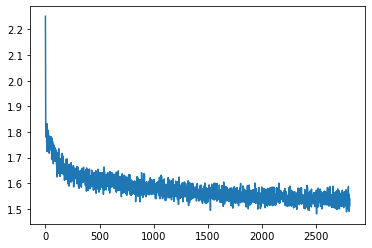

In [10]:
plt.plot(history);

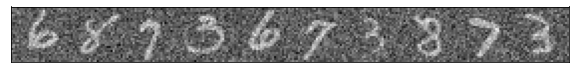

In [14]:
from util import plot_grid
samples = (iter(test_loader).next()[0])
samples = add_noise(samples)
plot_grid(samples.numpy(), grid_size=(10, 1))

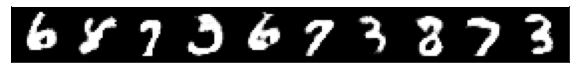

In [15]:
plot_grid(D(E(samples.view(-1, 28*28))).detach().numpy(),grid_size=(10, 1))

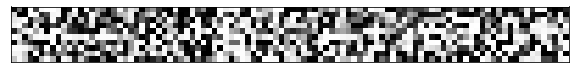

In [16]:
plot_grid(E(samples.view(-1, 28*28)).detach().numpy(), imsize=(10,10), grid_size=(10, 1))